<a href="https://colab.research.google.com/github/AbnerTS/UFMG-PROGRAMACAO-EM-PYTHON/blob/main/Topico10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Curso de Programação em Python



# Estatísticas sobre Gastos Parlamentares 
------------------

# 1. Introdução

---------------

A Cota para o Exercício da Atividade Parlamentar – CEAP (antiga verba indenizatória) é uma cota única mensal destinada a custear os gastos dos deputados exclusivamente vinculados ao exercício da atividade parlamentar.

Nessa atividade prática você deverá implementar uma série de funções para geração de gráficos sobre os gastos parlamentares utilizando os dados publicamente disponíveis sobre as despesas do [CEAP](https://dadosabertos.camara.leg.br/swagger/api.html "Arquivos - Despesas pela Cota para Exercício da Atividade Parlamentar"). 




# Tarefa 0 - Leitura dos dados
---------------

**Essa está pronta! :-)**

Nas duas células abaixo baixamos os arquivos CSVs de 2009 até 2020 e implementamos uma função para leitura dos dados contidos no arquivo CSV de um ano específico. A função retorna uma lista com os registros dos dados e uma outra lista que corresponde aos rótulos (nome das colunas). Essa função será utilizada nas próximas tarefas. Perceba que a lista com os registros dos dados é uma lista multidimensional. Depois, a função implementada <code>le_dados</code> é testada imprimindo os rótulos, a primeira linha dos dados e o número total de registros. Também imprimimos o índice de cada coluna nos registros para facilitar o acesso.

**OBS: Execute as duas células abaixo**

In [ ]:
import requests, os, zipfile

dir_name = 'dados_parlamentares' 

urls = ('http://www.camara.leg.br/cotas/Ano-2020.csv.zip',
        'http://www.camara.leg.br/cotas/Ano-2019.csv.zip',
        'http://www.camara.leg.br/cotas/Ano-2018.csv.zip',
        'http://www.camara.leg.br/cotas/Ano-2017.csv.zip',
        'http://www.camara.leg.br/cotas/Ano-2016.csv.zip',
        'http://www.camara.leg.br/cotas/Ano-2015.csv.zip',
        'http://www.camara.leg.br/cotas/Ano-2014.csv.zip', 
        'http://www.camara.leg.br/cotas/Ano-2013.csv.zip', 
        'http://www.camara.leg.br/cotas/Ano-2012.csv.zip',
        'http://www.camara.leg.br/cotas/Ano-2011.csv.zip',
        'http://www.camara.leg.br/cotas/Ano-2010.csv.zip',
        'http://www.camara.leg.br/cotas/Ano-2009.csv.zip')

if not os.path.exists(dir_name):
    os.mkdir(dir_name)
    
for url in urls:
    r = requests.get(url, allow_redirects=True)
    file_name = url.split('/')[-1]
    with open(file_name, 'wb') as f:
        f.write(r.content)
        with zipfile.ZipFile(file_name, 'r') as zip_ref:
            zip_ref.extractall(dir_name)
    if os.path.exists(file_name):
        os.remove(file_name)

In [ ]:
# Funcao que le os dados de um arquivo CSV e retorna a lista de rótulos (nome das colunas) e os dados.
# Estamos levando em consideracao que todos os dados do arquivo cabem na memória do computador.
def le_dados(filename):
    # Abrindo o arquivo. 
    # Utilizamos o parametro 'encoding' para indicar que o arquivo possui uma codificacao especifica. 
    # Isso garante que os acentos e caracteres especiais sejam lidos adequadamente.
    #with open(filename, 'r', encoding='ISO-8859-1') as file:
    with open(filename, 'r', encoding='UTF-8') as file:
        # Criando uma lista vazia para armazenar todos os dados do arquivo
        dados = []

        # Para cada linha do arquivo, realizamos as seguintes operacoes: 
        # (1) removemos o caractere '\n' do final da linha
        # (2) substituimos as ',' por ';' para evitar problemas com a separacao da parte decimal de valores.
        # (3) removemos as aspas extras
        # (4) transformamos a linha em uma lista
        # (5) adicionamos a lista de itens na lista 'dados'
        for line in file:
            #dados.append(line.rstrip().replace('","','";"').replace('"','').split(';'))
            dados.append(line.rstrip().replace('","','";"').split('";"'))
            dados[-1][0]=dados[-1][0].replace('"','')
            dados[-1][-1]=dados[-1][-1].replace('"','')
            
        
    # Separando a primeira linha do arquivo para uma lista separada de 'rotulos'
    rotulos = dados.pop(0)
    
    return rotulos, dados

############# BLOCO PRINCIPAL DO PROGRAMA #############
# Apenas um teste. Fique a vontade para alterar ou apagar esse trecho de código.

rotulos, dados = le_dados("dados_parlamentares/Ano-2019.csv")

# Para entender o formato dos dados
print(rotulos, "\n")
print("Registro na primeira posição:\n", dados[0])
print()
print("Nome do parlamentar: ", dados[0][0])
print("Número total de registros: %d\n" % (len(dados)))

# Para identificar o índice de cada coluna nos registros
print('Índice - Rótulo')
for i, rotulo in enumerate(rotulos):
    print(f'{i} - {rotulo}')

['\ufefftxNomeParlamentar', 'cpf', 'ideCadastro', 'nuCarteiraParlamentar', 'nuLegislatura', 'sgUF', 'sgPartido', 'codLegislatura', 'numSubCota', 'txtDescricao', 'numEspecificacaoSubCota', 'txtDescricaoEspecificacao', 'txtFornecedor', 'txtCNPJCPF', 'txtNumero', 'indTipoDocumento', 'datEmissao', 'vlrDocumento', 'vlrGlosa', 'vlrLiquido', 'numMes', 'numAno', 'numParcela', 'txtPassageiro', 'txtTrecho', 'numLote', 'numRessarcimento', 'vlrRestituicao', 'nuDeputadoId', 'ideDocumento', 'urlDocumento'] 

Registro na primeira posição:
 ['LID.GOV-CD', '', '', '', '2015', 'NA', '', '55', '13', 'FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR', '0', '', 'CRISTIANE FERREIRA EPP', '037.139.030/0010-8', '693', '4', '2019-01-16T00:00:00', '111.3', '0', '111.3', '1', '2019', '0', '', '', '1554246', '', '', '2812', '6738121', 'http://camara.leg.br/cota-parlamentar/nota-fiscal-eletronica?ideDocumentoFiscal=6738121']

Nome do parlamentar:  LID.GOV-CD
Número total de registros: 289393

Índice - Rótulo
0 - ﻿txNome

Tarefa 1 - Como é a evolução dos gastos ao longo dos anos?
---------

**Agora é com você!** 

Implemente funções para gerar um gráfico que mostra a evolução dos gastos das cotas da Câmara dos Deputados entre **2009 e 2020**.

**Dica:** a informação do gasto está na coluna identificada com o rótulo 'vlrLiquido'.

In [ ]:
## Bibliotecas utilizadas

import numpy as np
import matplotlib.pyplot as plt

from operator import itemgetter

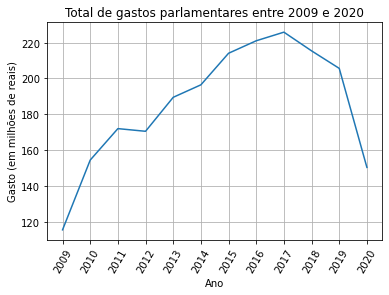

In [ ]:
# 2 - Uma função que retorna uma lista com os gastos totais da Câmara dos Deputados em um intervalo ('ano início' até 'ano fim')

def gastos_totais_intervalo(ano_inicio, ano_fim):
    gastos = []
    for ano in range(ano_inicio, ano_fim + 1):
        gasto_total_ano = 0
        rotulos, dados = le_dados(f"dados_parlamentares/Ano-{ano}.csv")

        # Iterar em cada registro de gasto
        # A informação do gasto está na coluna de rótulos identificada por 'vlrLiquido'
        index = rotulos.index('vlrLiquido')
        for registro in dados:            
            gasto_total_ano += float(registro[index])
                
        gastos.append((ano, gasto_total_ano))
        
    return gastos #Exemplo: [(2009, 1000), (2010, 100), (2011, 3000)]

# Plota um gráfico com a série temporal dos gastos totais da Câmara dos Deputados
# Entrada: lista de tuplas (ano, gasto)
def plot_serie_gastos(lista):    
    x = []
    y = []
    
    for ano, gasto in lista:
        x.append(str(ano)) 
        y.append(gasto/(10**6)) # Dividindo por 1 milhao para facilitar a representação

    plt.plot(x,y)    

    plt.xlabel('Ano')
    plt.ylabel('Gasto (em milhões de reais)')
    plt.title(f'Total de gastos parlamentares entre {x[0]} e {x[-1]}')    
    
    plt.xticks(rotation=60)
    plt.grid(True)

    plt.show() 

############# BLOCO PRINCIPAL DO PROGRAMA #############    
INICIO = 2009
FIM = 2020
gastos = gastos_totais_intervalo(INICIO, FIM)
plot_serie_gastos(gastos)


Tarefa 2 - Quais os deputados que mais gastaram?
---------

Implemente funções para gerar um gráfico de barras que mostra os **20 parlamentares** que mais gastaram em **2020**.

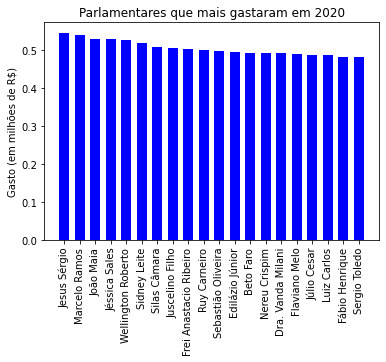

In [ ]:
# 3 - Uma função que retorna uma lista com os gastos totais de todos os parlamentares em um ano específico

def gastos_totais_por_parlamentar(ano):
    gastos_dict = {}
    rotulos, dados = le_dados(f"dados_parlamentares/Ano-{ano}.csv")

    # Iterar em cada registro de gasto
    # A informação do gasto está na coluna de rótulos identificada por 'vlrLiquido'
    index_nome = rotulos.index('\ufefftxNomeParlamentar')
    index_gasto = rotulos.index('vlrLiquido')
    for registro in dados:   
        nome_parlamentar = registro[index_nome]      
        valor_gasto = float(registro[index_gasto])
        gastos_dict[nome_parlamentar] = gastos_dict.get(nome_parlamentar, 0.0) + valor_gasto
        
    gastos = []
    for parlamentar, gasto in gastos_dict.items():
        gastos.append((parlamentar, gasto))
    return gastos

# Plota um gráfico de barras dos 20 parlamentares com os maiores gastos em um dado ano
# Entrada: lista de tuplas (nome parlamentar, total gasto)
def plot_gastos_deputados(gastos_par, ano):
    # Ordena dicionário em ordem decrescente, para começar com o deputador com o
    # maior gasto
    gastos_ordenados = sorted(gastos_par, key=itemgetter(1), reverse=True)

    valores = []
    nomes = []
    for deputado, valor in gastos_ordenados[:20]:
        valores.append(float(valor)/(10**6)) # Milhoes
        nomes.append(deputado)
    
    ind = np.arange(len(valores))  # the x locations for the groups
    
    plt.bar(ind, valores, width=0.65, color='b')
    
    plt.ylabel('Gasto (em milhões de R$)')
    plt.title(f'Parlamentares que mais gastaram em {ano}')
    
    plt.xticks(ind, nomes, rotation=90)
    
    plt.show()

############# BLOCO PRINCIPAL DO PROGRAMA #############

ANO = 2020
gastos_par = gastos_totais_por_parlamentar(ANO)
plot_gastos_deputados(gastos_par, ANO)

Tarefa 3 - Quais os partidos que mais gastam na média?
---------

Implemente funções para gerar um gráfico de barras que mostra o ***gasto médio*** de cada partido no ano de **2020**. Você deve exibir os dados de maneira decrescente, ou seja, do partido com o maior gasto médio para o menor.

***Dica***: o gasto médio do partido X é a soma dos gastos de todos os deputados filiados ao partido X dividido pela quantidade de deputados filiados ao partido X. Cuidado com deputados que mudam de partido ao longo do ano. O rótulo 'partido' está em branco em alguns registros (verificar se é diferente da string vazia ''). 

<>:17: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:17: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<ipython-input-6-f652db105e66>:17: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if partido is not '': #


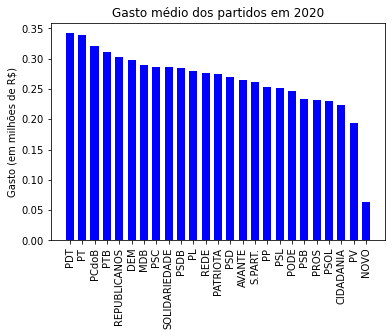

In [ ]:
# 4 - Uma função que retorna os gastos médios totais dos parlamentares por partido para um ano específico.

def gastos_totais_por_partido(ano):
    # key=partido, value=dicionario (ver abaixo: gastos_parlamentares_dict)
    gastos_partidos_dict = {}
    rotulos, dados = le_dados(f"dados_parlamentares/Ano-{ano}.csv")

    # Iterar em cada registro de gasto
    index_partido = rotulos.index('sgPartido')
    index_nome = rotulos.index('\ufefftxNomeParlamentar')
    index_gasto = rotulos.index('vlrLiquido')
    for registro in dados: 
        partido = registro[index_partido]
        nome_parlamentar = registro[index_nome]      
        valor_gasto = float(registro[index_gasto])
        
        if partido is not '': # 
            # key=deputado, value=gastos            
            gastos_parlamentares_dict = gastos_partidos_dict.get(partido, dict())
            gastos_parlamentares_dict[nome_parlamentar] = gastos_parlamentares_dict.get(nome_parlamentar, 0.0) + valor_gasto
            gastos_partidos_dict[partido] = gastos_parlamentares_dict         

    gastos = []
    for partido, dict_parlamentares in gastos_partidos_dict.items():
        media = sum(dict_parlamentares.values()) / len(dict_parlamentares)
        gastos.append((partido, media))
    return gastos

# Plota um gráfico de barras com o gasto dos partidos em um dado ano
# Entrada: lista de tuplas (partido, total gasto)
def plot_gastos_partidos(gastos, ano):
    
    
    gastos_ordenados = sorted(gastos, key=itemgetter(1), reverse=True)

    valores = []
    nomes = []
    for k, v in gastos_ordenados:
        valores.append(float(v)/(10**6)) # Milhoes
        nomes.append(k)
    
    ind = np.arange(len(valores))  # the x locations for the groups
    
    plt.bar(ind, valores, width=0.65, color='b')
    
    plt.title(f'Gasto médio dos partidos em {ano}')
    plt.ylabel('Gasto (em milhões de R$)')
    
    plt.xticks(ind, nomes, rotation=90)

    plt.show()

############# BLOCO PRINCIPAL DO PROGRAMA #############    
ANO = 2020
gastos_partidos = gastos_totais_por_partido(ANO)
plot_gastos_partidos(gastos_partidos, ANO)

Tarefa 4 - Quais os estados com os maiores gastos na média?
---------

Implemente funções para gerar um gráfico de barras que mostra o ***gasto médio*** de cada estado no ano de **2020**. Você deve exibir os dados de maneira decrescente, ou seja, do estado com o maior gasto médio para o menor.

***Dica***: o gasto médio do estado X é a soma dos gastos de todos os deputados do estado X dividido pela quantidade de deputados do estado X. O rótulo 'sgUF' está em branco em alguns registros (verificar se é diferente da string vazia '' e diferente de 'NA').

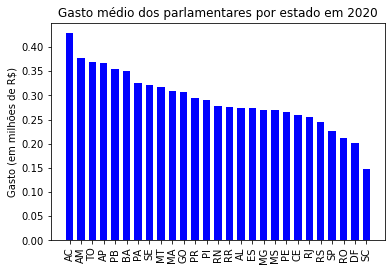

In [ ]:
# 5 - Uma função que retorna os gastos médios totais dos parlamentares por estado para um ano específico.

def gastos_totais_por_estado(ano):
    gastos_estados_dict = {}
    rotulos, dados = le_dados(f"dados_parlamentares/Ano-{ano}.csv")

    # Iterar em cada registro de gasto
    index_estado = rotulos.index('sgUF')
    index_nome = rotulos.index('\ufefftxNomeParlamentar')
    index_gasto = rotulos.index('vlrLiquido')
    for registro in dados: 
        estado = registro[index_estado]
        nome_parlamentar = registro[index_nome]      
        valor_gasto = float(registro[index_gasto])
        
        if estado != '' and estado != 'NA':            
            gastos_parlamentares_dict = gastos_estados_dict.get(estado, dict())
            gastos_parlamentares_dict[nome_parlamentar] = gastos_parlamentares_dict.get(nome_parlamentar, 0.0) + valor_gasto
            gastos_estados_dict[estado] = gastos_parlamentares_dict         

    gastos = []
    for estado, dict_parlamentares in gastos_estados_dict.items():
        media = sum(dict_parlamentares.values()) / len(dict_parlamentares)
        gastos.append((estado, media))
    return gastos

# Plota um gráfico de barras com o gasto dos estados em um dado ano
# Entrada: lista de tuplas (estado, total gasto)
def plot_gastos_estados(gastos, ano):
    
    gastos_ordenados = sorted(gastos, key=itemgetter(1), reverse=True)

    valores = []
    nomes = []
    for k, v in gastos_ordenados:
        valores.append(float(v)/(10**6)) # Milhoes
        nomes.append(k)
    
    ind = np.arange(len(valores))  # the x locations for the groups
    
    plt.bar(ind, valores, width=0.65, color='b')
    
    plt.title(f'Gasto médio dos parlamentares por estado em {ano}')
    plt.ylabel('Gasto (em milhões de R$)')
    
    plt.xticks(ind, nomes, rotation=90)
    
    plt.show()

############# BLOCO PRINCIPAL DO PROGRAMA #############
ANO = 2020
gastos_estados = gastos_totais_por_estado(ANO)
plot_gastos_estados(gastos_estados, ANO)    